In [3]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ["class","alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium","total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins","color_intensity", "hue", "od280_od315", "proline"]

from sklearn.model_selection import train_test_split

X = df_wine.iloc[:,1:].values
Y = df_wine.iloc[:,0].values

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.3, stratify= Y)

from sklearn.preprocessing import StandardScaler

SSC =  StandardScaler()
x_train_std = SSC.fit_transform(x_train)
x_test_std =  SSC.transform(x_test)


# Computing D dimensional mean

Note: Each mean vector, mi, stores the mean feature value Um , with respect to the examples of class i
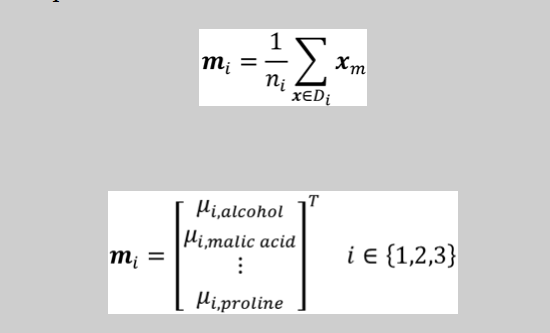

These mean vectors can be computed by the following code, where we compute one mean vector for each of the three labels:
Note:
- Within-class scatter: how spread out samples are around their class mean.
- Between-class scatter: how far apart the class means are from each other..


In [4]:
import numpy as np

np.set_printoptions(precision = 4) # DEcimal places
mean_vecs = []

for label in range(1,4):
    mean_vecs.append(np.mean(x_train_std[label == y_train], axis = 0))

    print(f"the Mv {label} : {mean_vecs[label - 1]}\n")
    # It took the values belongingto current class
    


the Mv 1 : [ 0.8811 -0.304   0.26   -0.7106  0.5471  0.8286  0.9181 -0.6143  0.5703
  0.1693  0.4363  0.7427  1.1829]

the Mv 2 : [-0.8918 -0.3455 -0.4007  0.1992 -0.4056 -0.0414  0.0775  0.0394  0.015
 -0.8439  0.4551  0.2696 -0.7675]

the Mv 3 : [ 0.2565  0.9012  0.2841  0.581  -0.0651 -0.9668 -1.2581  0.7035 -0.7313
  1.0682 -1.2317 -1.3311 -0.3067]



Note: 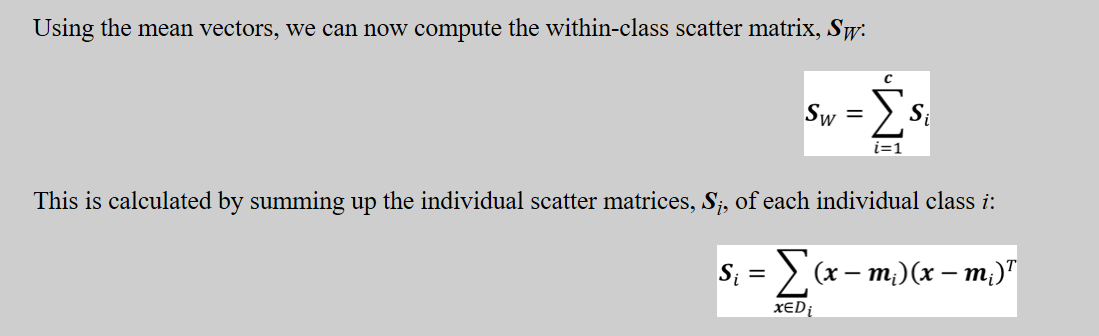

In [7]:
d =  13
S_W = np.zeros((d,d))

for labels, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in x_train_std[y_train == labels]:
        row,mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row - mv) * (row - mv).T

    S_W += class_scatter

